<h2 style="text-align: center;">Task Set 1</h2>
<h1 style="text-align: center;">Creating point processes. The Poisson point process.</h1>

<h3 style>Part I. Modeling of Point Processes</h2>

#### 1.  Wczytanie potrzebnych pakietów

In [1]:
library(spatstat)

Ładowanie wymaganego pakietu: spatstat.data

Ładowanie wymaganego pakietu: spatstat.univar

spatstat.univar 3.1-1

Ładowanie wymaganego pakietu: spatstat.geom

spatstat.geom 3.3-4

Ładowanie wymaganego pakietu: spatstat.random

spatstat.random 3.3-2

Ładowanie wymaganego pakietu: spatstat.explore

Ładowanie wymaganego pakietu: nlme

spatstat.explore 3.3-3

Ładowanie wymaganego pakietu: spatstat.model

Ładowanie wymaganego pakietu: rpart

spatstat.model 3.3-3

Ładowanie wymaganego pakietu: spatstat.linnet

spatstat.linnet 3.2-3


spatstat 3.3-0 
For an introduction to spatstat, type 'beginner' 




#### 2. Generowanie punktów przy użyciu funkcji runif() w prostokącie 
Wygeneruj 200 punktów rozmieszczonych równomiernie w obszarze prostokątnym używając funkcji
`runif()`. Współrzędne prostokąta powinny wynosić: x ∈ [0,1] , y ∈ [0,2]. 

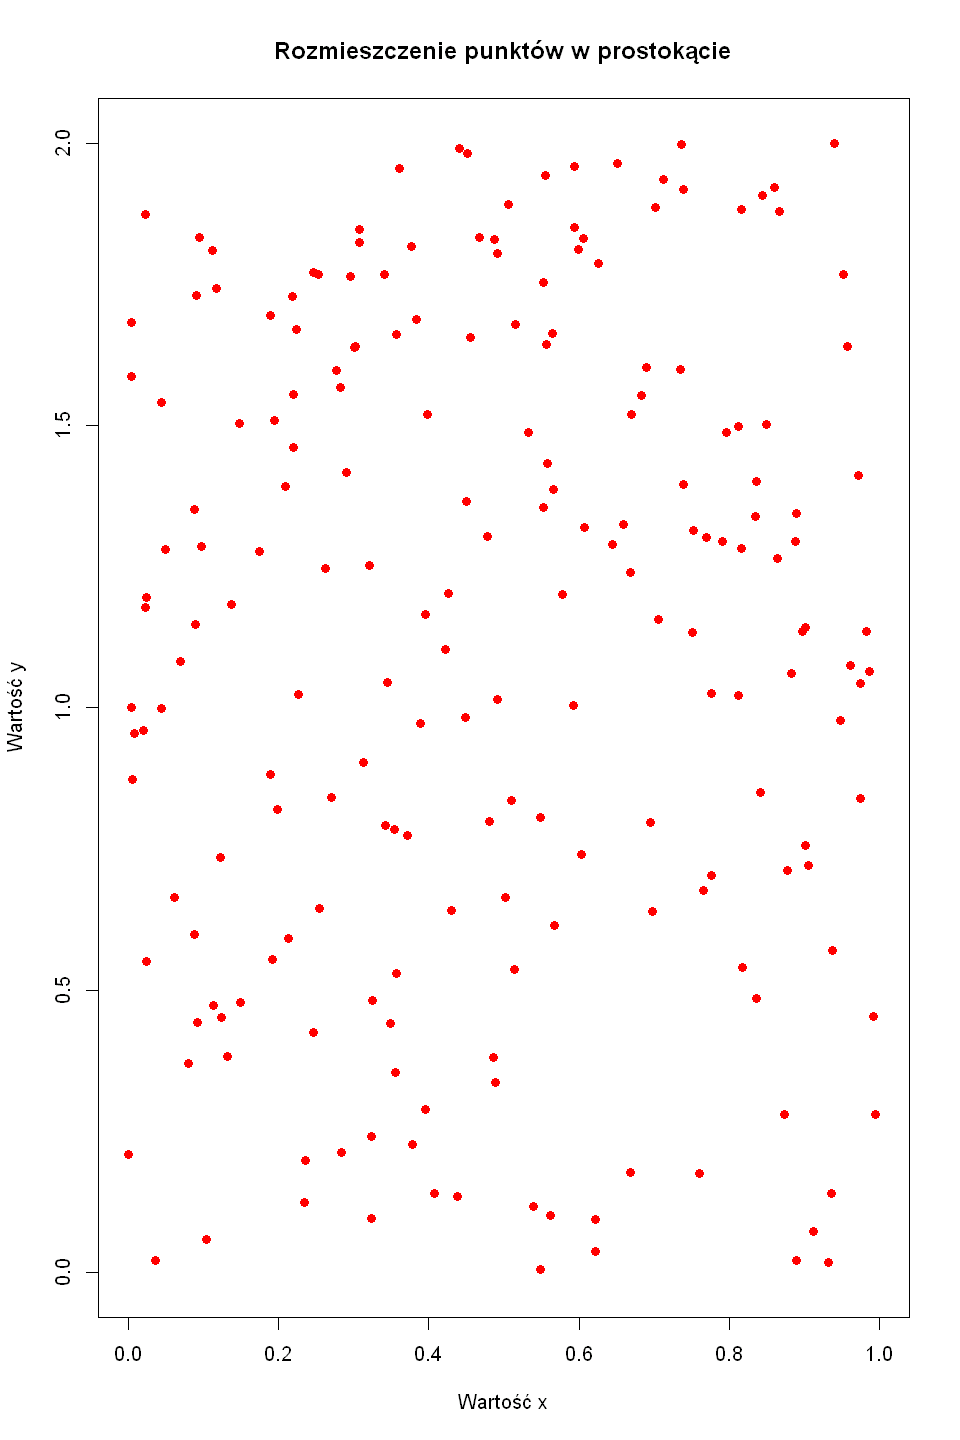

In [2]:
n_points <- 200

# Generowanie współrzędnych
x_1 <- runif(n_points, min = 0, max = 1)
y_1 <- runif(n_points, min = 0, max = 2)

options(repr.plot.width = 8, repr.plot.height = 12) # Ustawienie szerokości okna

# Wykres punktów w prostokącie
plot(x_1, y_1, main = "Rozmieszczenie punktów w prostokącie",
     xlab = "Wartość x", ylab = "Wartość y", xlim = c(0, 1), ylim = c(0, 2),
     pch = 19, col = "red")


#### 2. Poprawne wyświetlenie punktów w konturze prostokąta
Wyświetl wygenerowane punkty. W przypadku danych przestrzennych bardzo ważne jest, aby
zachować prawdziwe odległości. Dane zostały wygenerowane w obszarze prostokąta, którego
wysokość jest dwa razy większa niż szerokość. Należy ustawić skalę tak, aby jednostka na osi X miała
taką samą wielkość jak jednostka na osi Y. Stosunek skali osi Y do skali osi X nazywany jest
współczynnikiem kształtu lub proporcją obrazu (aspect ratio). Dla danych przestrzennych
współczynnik ten zawsze powinien wynosić 1:1. Wyświetl wygenerowane punkty w prawidłowej
skali. Nanieś kontur prostokąta. 

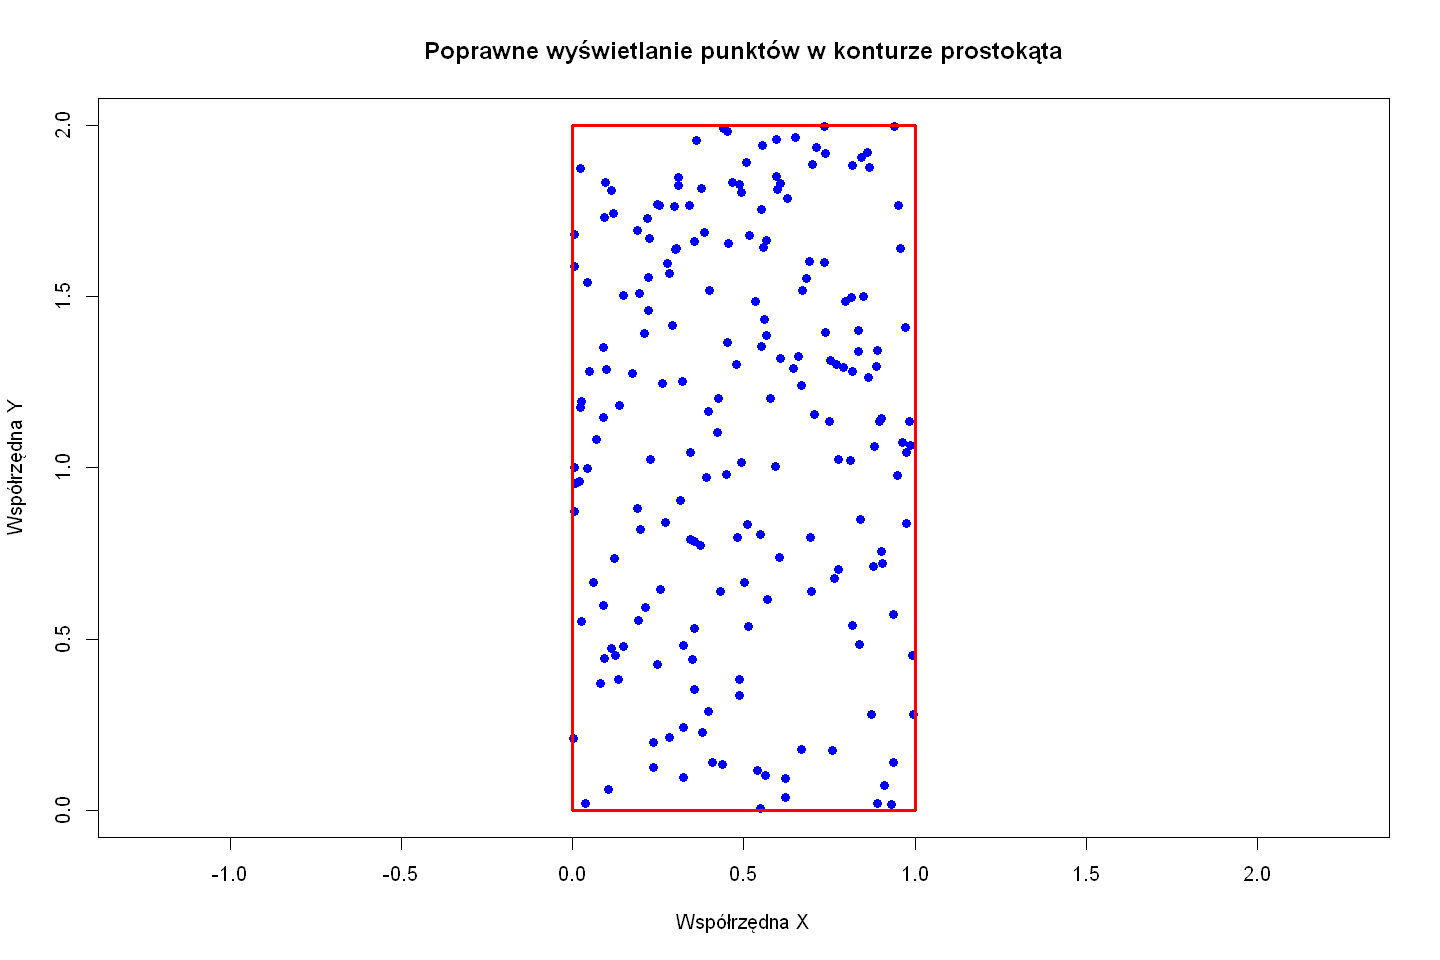

In [3]:
options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wykres punktów z prawidłowym współczynnikiem proporcji (asp = 1)
plot(x_1, y_1, main = "Poprawne wyświetlanie punktów w konturze prostokąta",
     xlab = "Współrzędna X", ylab = "Współrzędna Y", xlim = c(0, 1), ylim = c(0, 2),
     pch = 19, col = "blue", asp = 1)

# Kontur prostokąta
rect(0,0,1,2, border = "red", lwd = 3)

#### 4. Generowanie punktów w okręgu
Wygeneruj 300 punktów rozmieszczonych równomiernie w okręgu o promieniu r=10. Utwórz zmienną `r_squared` (300 punktów od 0 do 100(r²)). Następnie wygeneruj równomiernie kąty (`angle`) od 0 do 2π. Oblicz współrzędne x i y za pomocą wzoru:
$$x = \sqrt{r_{\text{squared}}} \cdot \cos(\text{angle})$$
$$y = \sqrt{r_{\text{squared}}} \cdot \sin(\text{angle})$$


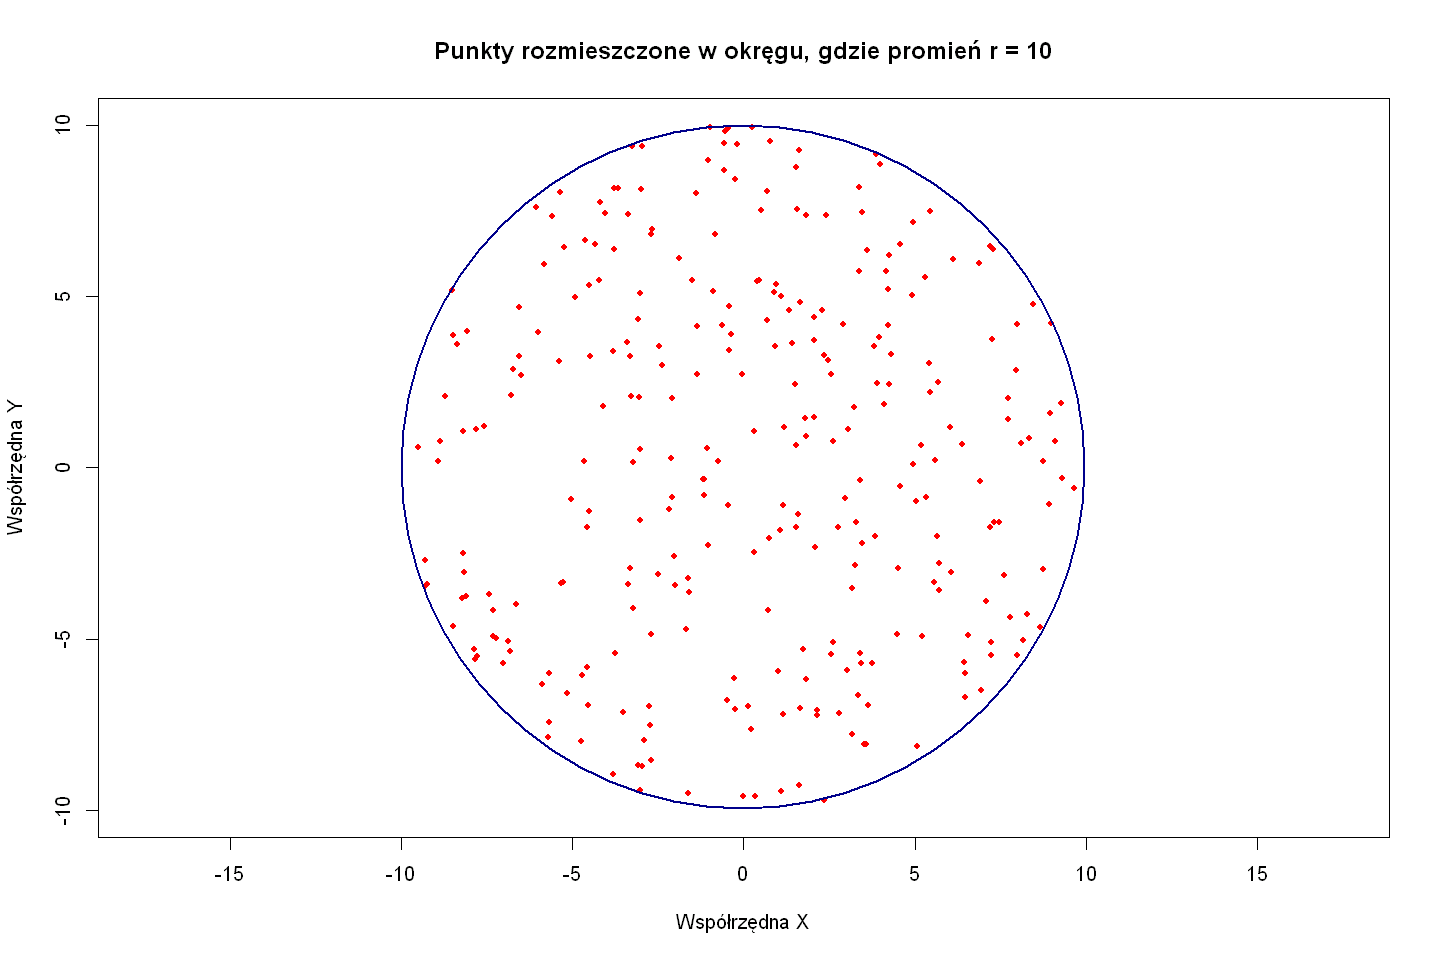

In [4]:
# Ustawienia promienia i liczby punktów
r <- 10
n_points_300 <- 300

# Generowanie zmiennych r_squared i angle
r_squared <- runif(n_points_300, min = 0, max = 1) * 100
angle <- runif(n_points_300, min = 0, max = 2 * pi)

# Obliczanie współrzędnych x i y
x_coords_300 <- sqrt(r_squared) * cos(angle)
y_coords_300 <- sqrt(r_squared) * sin(angle)

options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Rysowanie punktów w okręgu
plot(x_coords_300, y_coords_300,
     main = "Punkty rozmieszczone w okręgu, gdzie promień r = 10",
     xlab = "Współrzędna X", ylab = "Współrzędna Y",
     pch = 20, col = "red", asp = 1, xlim = c(-10, 10), ylim = c(-10, 10))

# Dodanie konturu okręgu
symbols(0, 0, circles = r, add = TRUE, inches = FALSE, fg = "darkblue", lwd = 2)

#### 5. Wczytanie spatstat i rysowanie okręgu przy uzyciu funkcji disc()
Wczytaj bibliotekę `spatstat`. Narysuj okrąg o promieniu 10 używając funkcji `disc()` wraz z
wygenerowanymi punktami. 

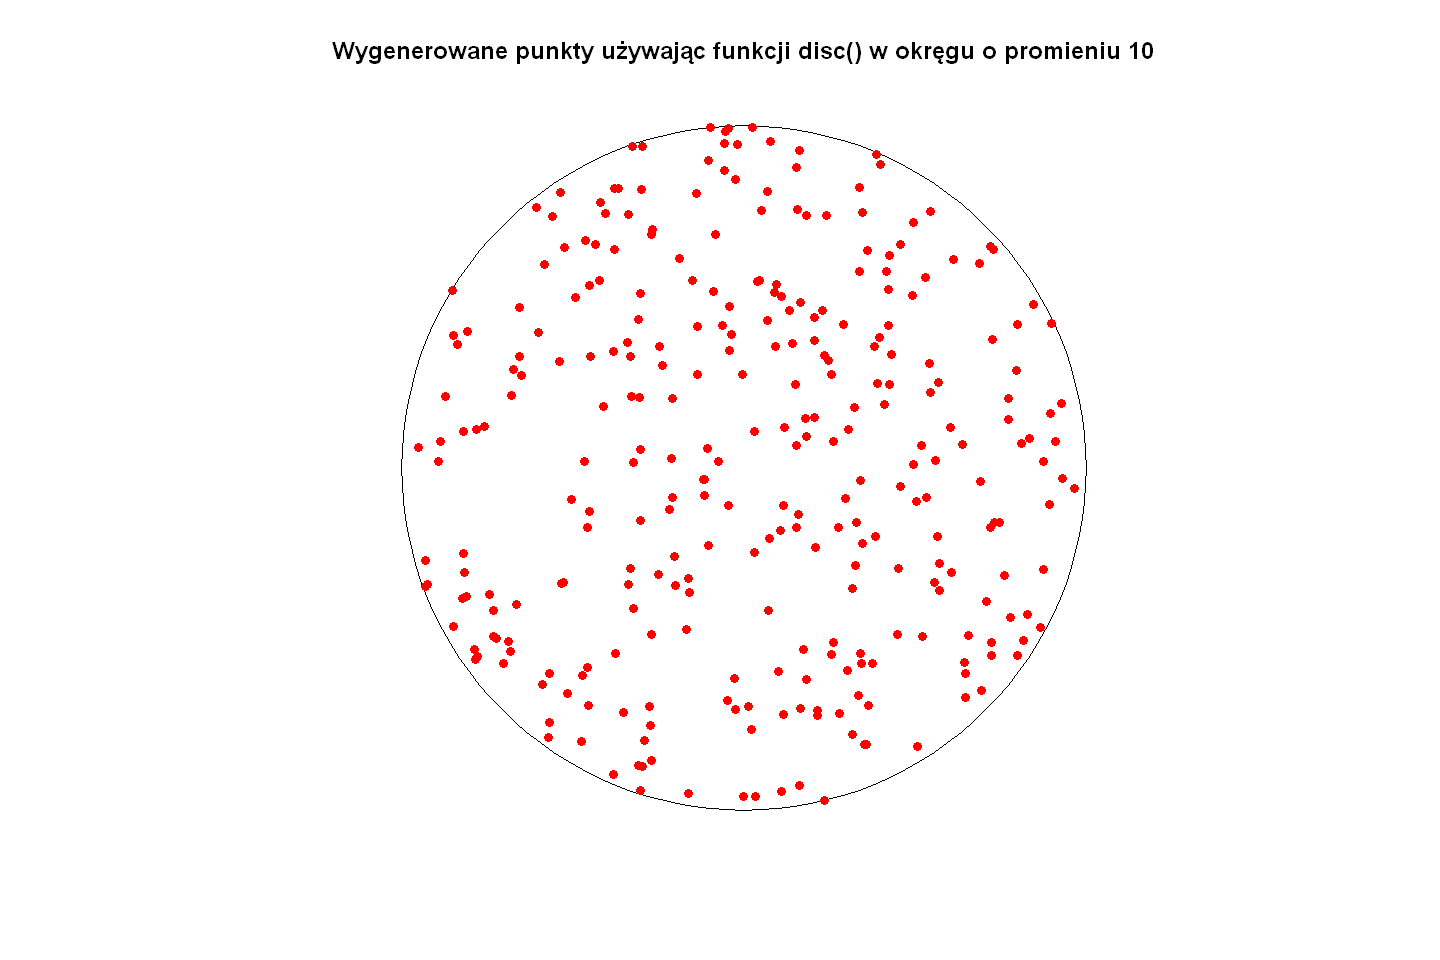

In [5]:
# Tworzenie okręgu o promieniu r
circle <- disc(radius = r)

# Rysowanie okręgu i punktów
plot(circle, xlim = c(-10, 10), ylim = c(-10, 10), xlab = "Współrzędna X", ylab = "Współrzędna Y", asp = 1, 
     main = "Wygenerowane punkty używając funkcji disc() w okręgu o promieniu 10", pch = 16)

# Nanoszenie wygenerowanych punktów
points(x_coords_300, y_coords_300, pch = 16,  col = "red") 

#### 6. Test zliczający ilość punktów w podobszarach
Aby sprawdzić, czy punkty z poprzedniego zadania zostały całkowicie przypadkowo rozmieszczone,
wykonaj test zliczający ilość punktów w każdym podobszarze. Utwórz obiekt `planar point pattern`
za pomocą funkcji `ppp()`. Ustaw współrzędne takie jak w poprzednim zadaniu oraz okno jako okrąg
o promieniu 10. Wykonaj test używając `quadrat.test()`, którego argumentem będzie utworzony
obiekt. Wyświetl oraz wypisz wyniki testu. Na wykresie zobaczysz obserwowaną i oczekiwaną liczbę
punktów w każdym kwadracie, a także miarę tego jak ta liczba znajduje się daleko powyżej/poniżej
wartości oczekiwanej. Czy `wartość p` (`p-value`) pozwala odrzucić hipotezę zerową o całkowicie
losowym rozmieszczeniu punktów?

Warning message:
"1 point was rejected as lying outside the specified window"


Obiekt planar point pattern (ppp):
Planar point pattern: 299 points
window: polygonal boundary
enclosing rectangle: [-10, 10] x [-10, 10] units
*** 1 illegal point stored in attr(,"rejects") ***


Warning message:
"Some expected counts are small; chi^2 approximation may be inaccurate"



Wyniki testu Quadrat:

	Chi-squared test of CSR using quadrat counts

data:  pp_pattern
X2 = 31.197, df = 24, p-value = 0.2964
alternative hypothesis: two.sided

Quadrats: 25 tiles (irregular windows)

Wartość p (p-value) wynosi:  0.2963811 
Nie ma wystarczających dowodów do odrzucenia hipotezy zerowej o losowym rozmieszczeniu punktów.


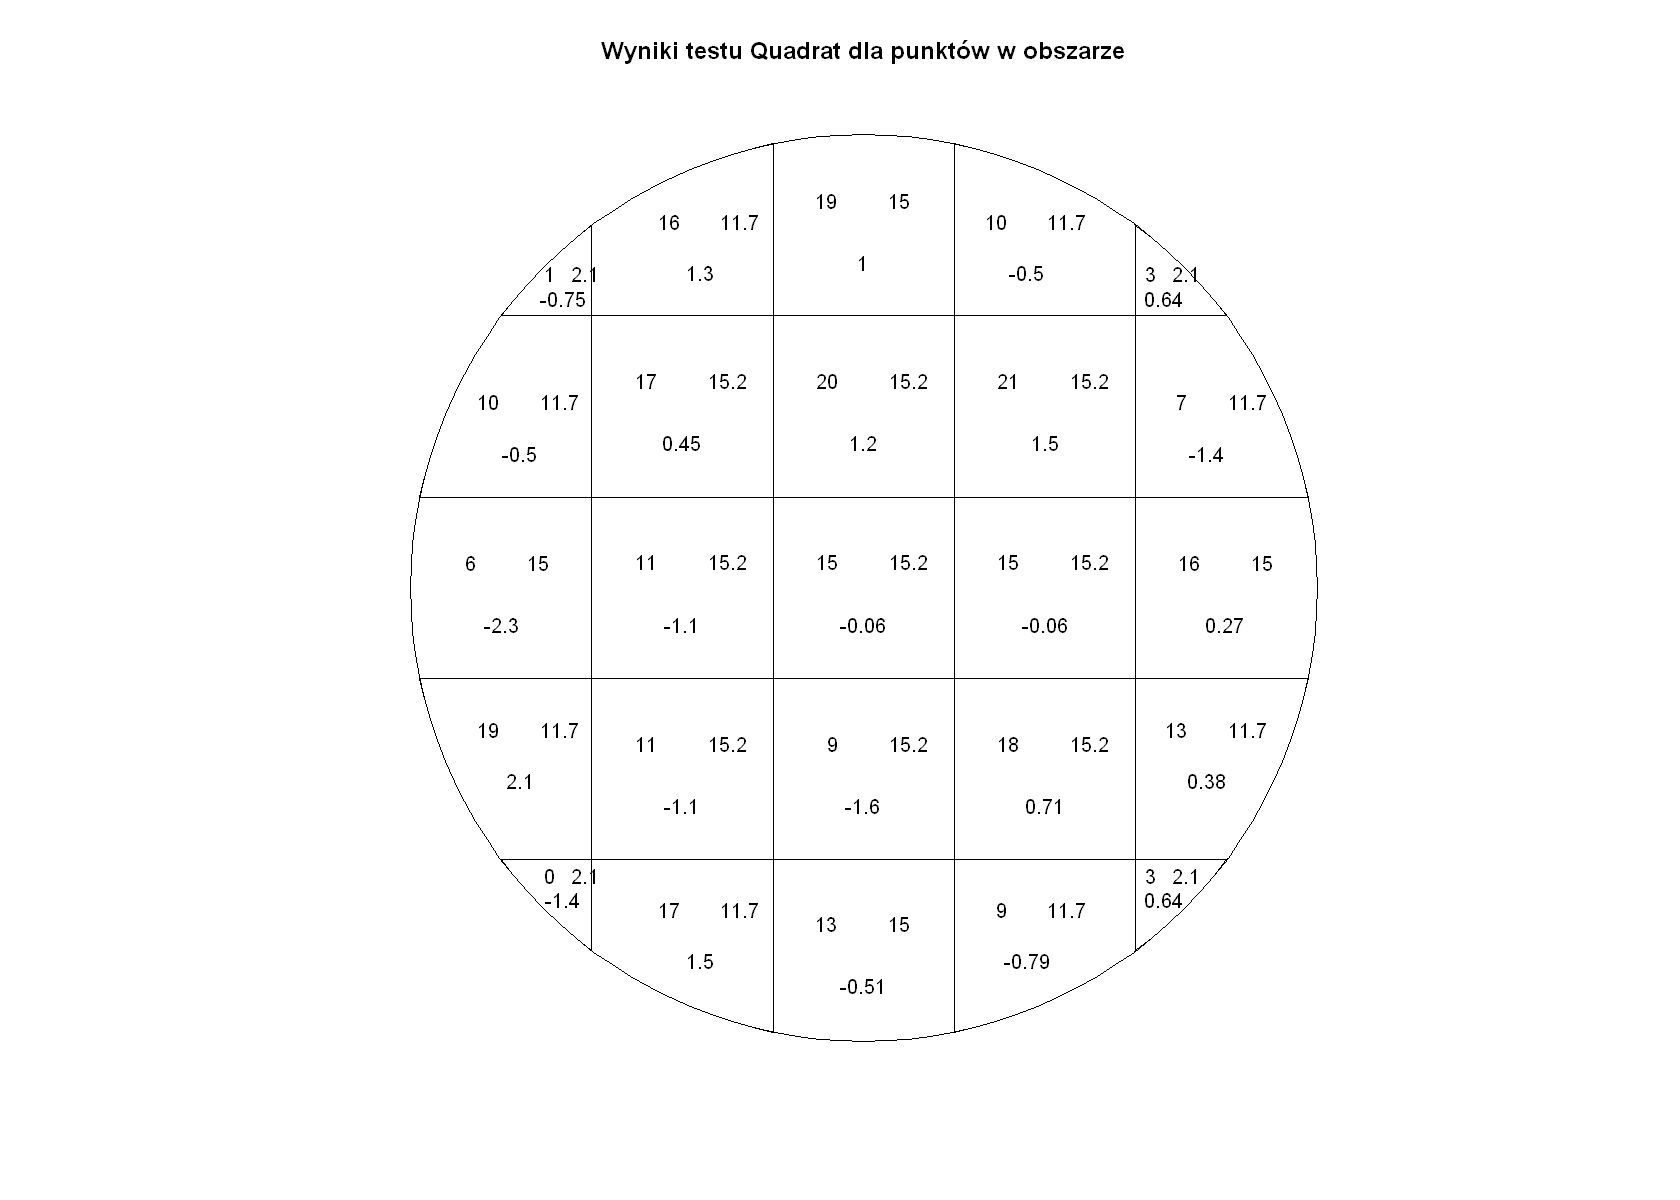

In [6]:
# Tworzenie obiektu planar point pattern (ppp)
pp_pattern <- ppp(x_coords_300, y_coords_300, window = circle)
cat("Obiekt planar point pattern (ppp):\n")
print(pp_pattern)

# Wykonanie testu Quadrat z podziałem na siatkę 5x5
quadrat_test_result <- quadrat.test(pp_pattern, nx = 5, ny = 5)
cat("\nWyniki testu Quadrat:\n")
print(quadrat_test_result)

options(repr.plot.width = 14, repr.plot.height = 10) # Ustawienie szerokości okna

# Wizualizacja wyników testu Quadrat
plot(quadrat_test_result, main = "Wyniki testu Quadrat dla punktów w obszarze")

# Wypisanie wartości p-value oraz interpretacja wyników testu
cat("\nWartość p (p-value) wynosi: ", quadrat_test_result$p.value, "\n")

if (quadrat_test_result$p.value < 0.05) {
  cat("Na podstawie wartości p = ", quadrat_test_result$p.value ," można odrzucić hipotezę zerową o losowym rozmieszczeniu punktów.\n")
} else {
  cat("Nie ma wystarczających dowodów do odrzucenia hipotezy zerowej o losowym rozmieszczeniu punktów.\n")
}

<h3 style>Part II. Poisson Point Process</h3>


Podstawowym modelem losowego zbioru punktowego jest `jednorodny proces punktowy Poissona na płaszczyźnie o natężeniu` $\lambda$, nazywany całkowitą losowością przestrzenną `(_Complete Spatial Randomness_, CSR)`.

Jednorodny proces punktowy o natężeniu $\lambda > 0$ charakteryzuje się następującymi właściwościami:

- Ilość punktów należąca do podregionu $B$ ($N(B)$) jest zmienną losową Poissona
- Liczba oczekiwana ilości punktów należących do $B$ wynosi:
  $$
  E[N(B)] = \text{area}(B)
  $$
- Jeśli podregiony $B_1$ oraz $B_2$ są rozłączne, to $N(B_1)$ oraz $N(B_2)$ są niezależnymi zmiennymi losowymi.

Jednorodny proces Poissona (CSR) jest zwykle przyjmowany jako "model zerowy". W analizie danych punktowych celem będzie znalezienie hipotezy alternatywnej przeciwko CSR.

Klasycznym testem dla sprawdzenia hipotezy zerowej jest test $\chi^2$ oparty na liczeniu w kwadratach. Polega ona na podziale okna na równe podobszary i zliczaniu ilu punktów przypada na każdy podobszar. W tym przypadku, akceptacja hipotezy zerowej będzie oznaczać, że w każdym podobszarze możemy spodziewać się takiej samej ilości punktów. Aby sprawdzić zgodność obszaru rozkładu można zastosować **test $\chi^2$ Pearsona**. W każdym obszarze znajduje się obserwowana liczba punktów, liczba wynikająca z modelu oraz reszta Pearsona.


#### 7. Generowanie procesów przestrzennych Poissona
Proces punktowy Poissona tworzy zdarzenia zgodnie z rozkładem Poissona z parametrem
intensywności określającym oczekiwane zdarzenia na jednostkę powierzchni. Za pomocą funkcji
rpoispp() biblioteki spatstat, wygeneruj procesy przestrzenne Poissona z podaną intensywnością i
oknem, które nie są uzależnione od sumy punktów.
- Utwórz okrąg o promieniu 10.
- Aby wygenerować około 500 punktów w okręgu ustaw wartość intensywności 𝜆 jako iloraz
aproksymowanej ilości punktów przez powierzchnię koła.
- Wygeneruj losowy wzorzec punktowy Poissona o intensywnosci 𝜆 i zadanym oknie. Wyświel
otrzymany wynik. 

Liczba wygenerowanych punktów:  483 


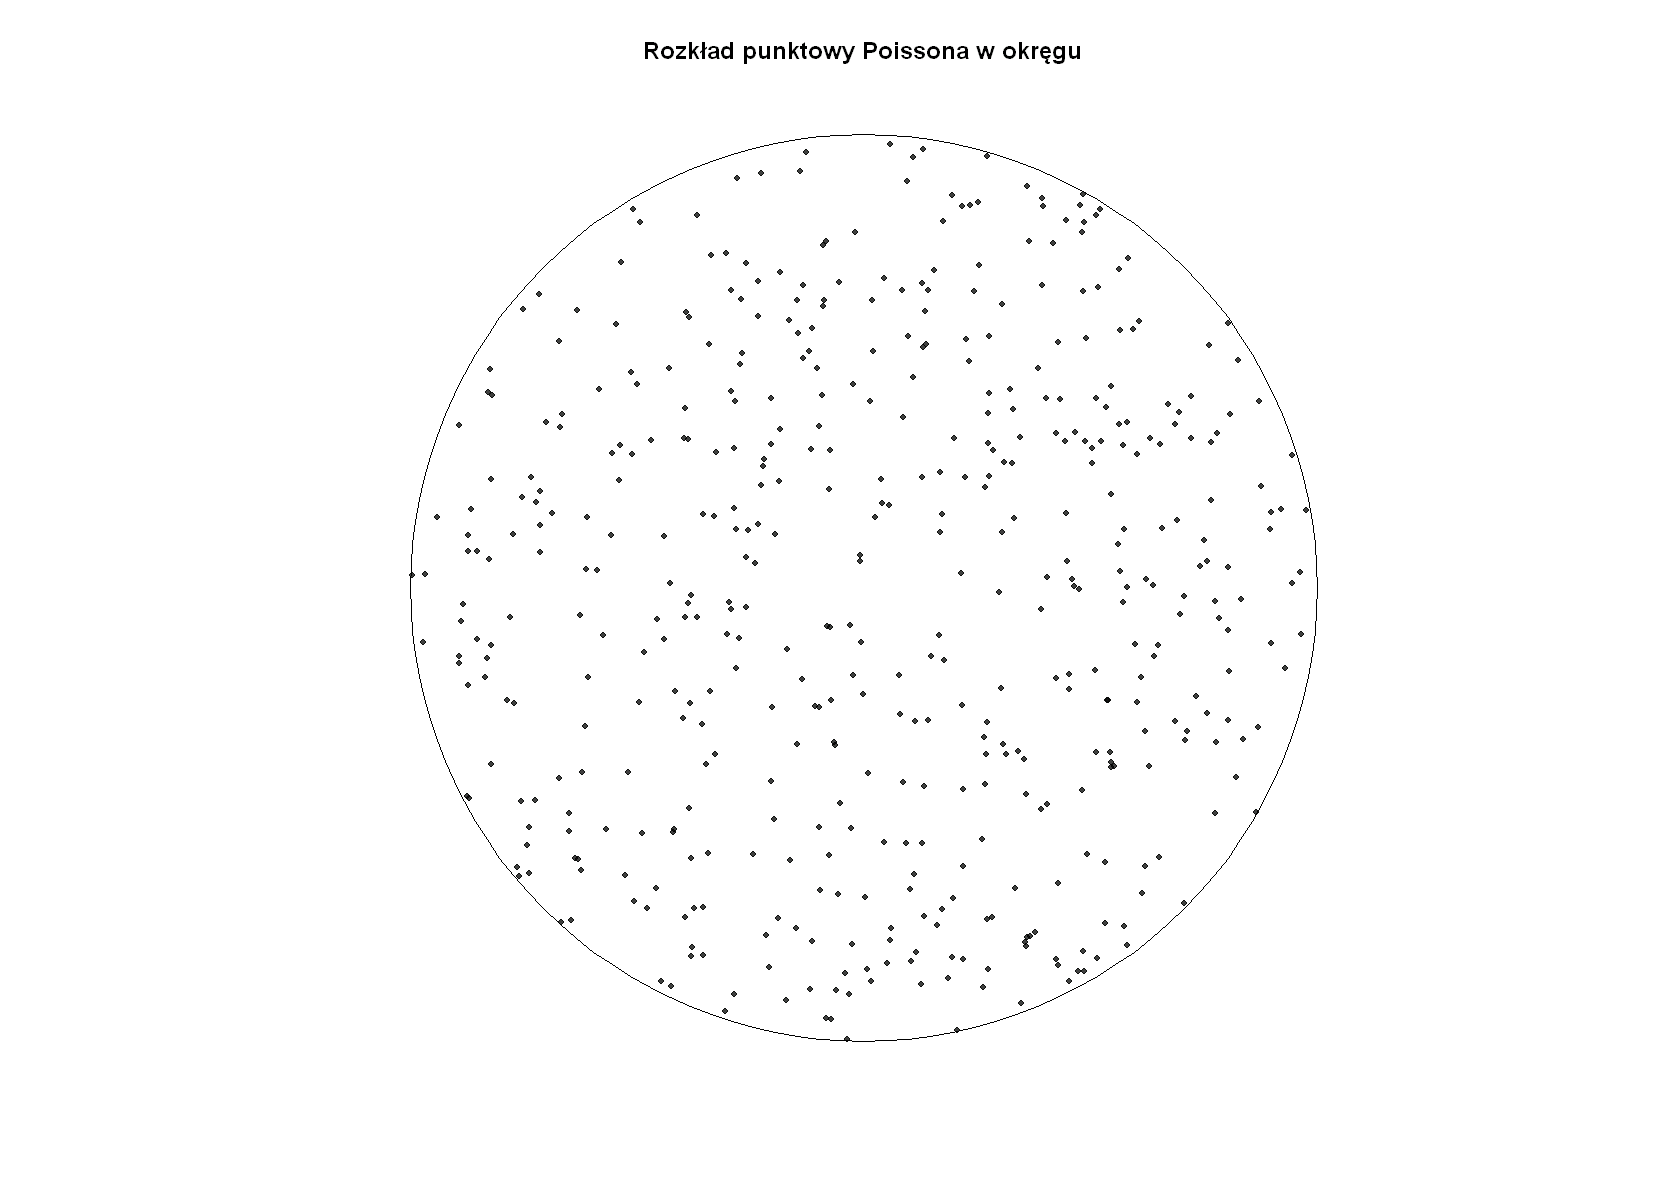

In [7]:
# Obliczenie intensywności lambda
lambda <- 500 / (pi * 10^2)  # Aproksymowana intensywność (500 punktów na powierzchnię koła)

# Generowanie procesu punktowego Poissona z intensywnością lambda i zadanym oknem
poisson_process <- rpoispp(lambda, win = circle)

# Wizualizacja wygenerowanego procesu punktowego
plot(poisson_process, main = "Rozkład punktowy Poissona w okręgu", 
     xlab = "Współrzędna X",  ylab = "Współrzędna Y", pch=20)

# Obliczenie liczby wygenerowanych punktów i wypisanie
number_of_points <- npoints(poisson_process)
cat("Liczba wygenerowanych punktów: ", number_of_points, "\n")